## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

**[1]** Изучим первые 15 строк массива и посмотрим на состав столбцов.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
data = pd.read_csv('/datasets/data.csv')
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**[2]** Построим гистограмму ежемесячных доходов.

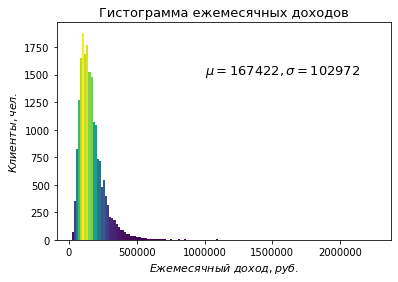

count      19351.0
mean      167422.0
std       102972.0
min        20667.0
25%       103053.0
50%       145018.0
75%       203435.0
max      2265604.0
Name: total_income, dtype: float64


In [112]:
ax1 = plt.hist(data['total_income'], bins=int(np.sqrt(len(data))))

# N — счетчик в каждом баре (столбце), bins — нижняя граница бара
N, bins, patches = plt.hist(data['total_income'], bins=int(np.sqrt(len(data))))
                               
# Для кодирования цвета будем использовать относительную высоту
fracs = N / N.max()

# нормализуем fracs до промежутка между 0 и 1 для полноценного цветового диапазона
norm = colors.Normalize(fracs.min(), fracs.max())

# нужно пройтись циклом по полученным объектам и установить цвет для каждого в отдельности
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

ax1 = plt.xlabel('$Ежемесячный$ $доход, руб.$', fontsize=11)
ax1 = plt.ylabel('$Клиенты, чел.$', fontsize=11)
plt.title('Гистограмма ежемесячных доходов', fontsize=13)
plt.text(1000000, 1500, '$\mu=167422,\sigma=102972$', fontsize=13)
plt.show()
print(round(data['total_income'].describe()))

**[3]** Построим гистограмму возраста клиентов.

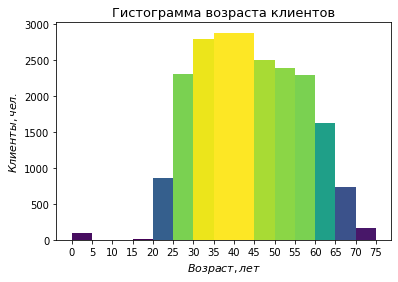

In [113]:
plt.xticks(np.arange((data['dob_years'].min()), (data['dob_years'].max() + 5), 5.0))
ax2 = plt.hist(data['dob_years'], bins=15, color='tab:purple')

# N — счетчик в каждом баре (столбце), bins — нижняя граница бара
N, bins, patches = plt.hist(data['dob_years'], bins=15)
                               
# Для кодирования цвета будем использовать относительную высоту
fracs = N / N.max()

# нормализуем fracs до промежутка между 0 и 1 для полноценного цветового диапазона
norm = colors.Normalize(fracs.min(), fracs.max())

# нужно пройтись циклом по полученным объектам и установить цвет для каждого в отдельности
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

ax2 = plt.xlabel('$Возраст, лет$', fontsize=11)
ax2 = plt.ylabel('$Клиенты, чел.$', fontsize=11)
plt.title('Гистограмма возраста клиентов', fontsize=13)
plt.show()

**[4]** Построим гистограмму численности детей.

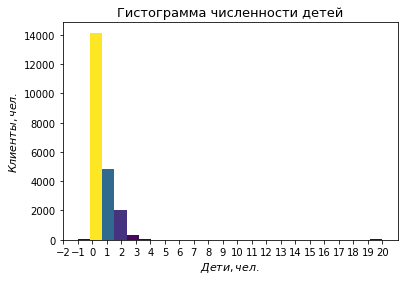

In [114]:
plt.xticks(np.arange((data['children'].min()-1), (data['children'].max() + 1), 1.0))
ax3 = plt.hist(data['children'], bins=25)

# N — счетчик в каждом баре (столбце), bins — нижняя граница бара
N, bins, patches = plt.hist(data['children'], bins=25)
                               
# Для кодирования цвета будем использовать относительную высоту
fracs = N / N.max()

# нормализуем fracs до промежутка между 0 и 1 для полноценного цветового диапазона
norm = colors.Normalize(fracs.min(), fracs.max())

# нужно пройтись циклом по полученным объектам и установить цвет для каждого в отдельности
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

ax3 = plt.xlabel('$Дети, чел.$', fontsize=11)
ax3 = plt.ylabel('$Клиенты, чел.$', fontsize=11)
plt.title('Гистограмма численности детей', fontsize=13)
plt.show()

**[5]** Построим гистограмму дней трудового стажа.

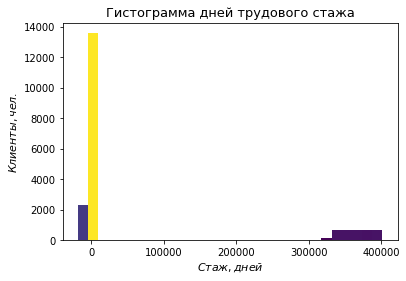

In [115]:
ax4 = plt.hist(data['days_employed'], bins=30, color='tab:blue')

# N — счетчик в каждом баре (столбце), bins — нижняя граница бара
N, bins, patches = plt.hist(data['days_employed'], bins=30)
                               
# Для кодирования цвета будем использовать относительную высоту
fracs = N / N.max()

# нормализуем fracs до промежутка между 0 и 1 для полноценного цветового диапазона
norm = colors.Normalize(fracs.min(), fracs.max())

# нужно пройтись циклом по полученным объектам и установить цвет для каждого в отдельности
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

ax4 = plt.xlabel('$Стаж, дней$', fontsize=11)
ax4 = plt.ylabel('$Клиенты, чел.$', fontsize=11)
plt.title('Гистограмма дней трудового стажа', fontsize=13)
plt.show()

Для наглядности построим точечную диаграмму зависимости трудового стажа от возраста клиента для трех классов: нулевого возраста клиента, положительного и отрицательного трудового стажа.

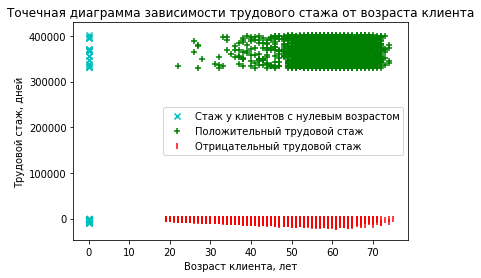

In [116]:
# сделаем выборку из нулевого возраста и соотвествующих значений трудового стажа
zero_age = data.loc[data['dob_years'] == 0, 'dob_years']
days_employed_for_age_null = data.loc[data['dob_years'] == 0, 'days_employed']

# сделаем выборку из положительных значений трудового стажа и возраста клиентов (без нулевых возрастов)
age_for_positive_days_employed = data.loc[(data['days_employed'] > 0) & (data['dob_years'] != 0), 'dob_years']
positive_days_employed = data.loc[(data['days_employed'] > 0) & (data['dob_years'] != 0), 'days_employed']

# сделаем выборку из отрицательных значений трудового стажа и возраста клиентов (без нулевых возрастов)
age_for_negative_days_employed = data.loc[(data['days_employed'] < 0) & (data['dob_years'] != 0), 'dob_years']
negative_days_employed = data.loc[(data['days_employed'] < 0) & (data['dob_years'] != 0), 'days_employed']

# строим диаграмму
plt.title('Точечная диаграмма зависимости трудового стажа от возраста клиента')
plt.xlabel('Возраст клиента, лет')
plt.ylabel('Трудовой стаж, дней')
plt.scatter(zero_age, days_employed_for_age_null, 
            c = 'c', marker = 'x', label = 'Стаж у клиентов с нулевым возрастом')
plt.scatter(age_for_positive_days_employed, positive_days_employed, 
            c = 'g', marker = '+', label = 'Положительный трудовой стаж')
plt.scatter(age_for_negative_days_employed, negative_days_employed, 
            c = 'r', marker = '|', label = 'Отрицательный трудовой стаж')
plt.legend()
plt.show()

### Вывод

**[1]** В файле *'data.csv'* обнаружен двумерный массив из данных о 21525 клиентах: каждый клиент описывается 12 признаками, 4 из которых относятся к количественным признакам, 8 – к категориальным или бинарным.

Существуют пропущенные значения по общему трудовому стажу (*'days_employed'*) и ежемесячному доходу (*'total_income'*) у 2174 клиентов, это около 10% от общего числа клиентов – немалая величина. Необходимо проверить, является ли отсутствие данных по трудовому стажу причиной отсутствия данных по доходам, и наоборот.

Значения уровня образования указаны то прописными буквами, то — строчными. В будущем необходимо сделать выбор уровня образования с помощью выпадающего списка, чтобы устранить человеческий фактор при наборе этого признака. В данном массиве необходимо все значения привести к нижнему регистру для единообразия.


**[2]** Серьезных аномалий в ежемесячных доходов не выявлено, если не считать пропущенные значения и асимметрии справа. Полученные на данном этапе статистики вроде матожидания, равного 167 422 руб. и стандартного отклонения в 102 972 руб., будут пересчитаны после обработки пропусков.

**[3]** В данные о возрасте клиентов попали нулевые значения, их надо будет устранить, а также обратить внимание, действительно ли ошибка вызвана человеческим фактором.


**[4]** У большинства клиентов численность детей варьируется от 0 до 4, однако, у некоторых все же детей -1 чел. или 20 чел. Эти выбросы будут заменены из предположения, что вместо 1 ребенка записали вручную -1, а под 20 детьми подразумевали все-таки только двоих.


**[5]** И, наконец, победитель количественных аномалий — дни трудового стажа клиентов. Здесь присутствуют как отрицательные значения, так и положительные (но уже масштабом в сотни лет). Требуется информация от сотрудников, выгружавших эти данные: что именно под ними подразумевается. Возможно, эти данные отображают временную дельту от базовой даты.

### Шаг 2. Предобработка данных

### Обработка пропусков

**[1]** Обработка пропущенных значений ежемесячного дохода

Заменим пустые значения в ежемесячном доходе на медианные по каждому типу занятости.

In [117]:
# Для этого проверим, в каких типах занятости встречаются пропущенные значения доходов.
data.loc[data['total_income'].isnull(), 'income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

In [118]:
# Найдем медианные уровни дохода для каждого типа занятости
medians_total_income = data.groupby('income_type')['total_income'].median()
round(medians_total_income)

income_type
безработный        131340.0
в декрете           53829.0
госслужащий        150448.0
компаньон          172358.0
пенсионер          118514.0
предприниматель    499163.0
сотрудник          142594.0
студент             98202.0
Name: total_income, dtype: float64

In [119]:
# Заменим пропущенные значения ежемесячного дохода на медианы по типам занятости.
data.loc[(data['total_income'].isnull()) & (data['income_type'] == 'сотрудник'), 'total_income'] = medians_total_income[6]
data.loc[(data['total_income'].isnull()) & (data['income_type'] == 'компаньон'), 'total_income'] = medians_total_income[3]
data.loc[(data['total_income'].isnull()) & (data['income_type'] == 'пенсионер'), 'total_income'] = medians_total_income[4]
data.loc[(data['total_income'].isnull()) & (data['income_type'] == 'госслужащий'), 'total_income'] = medians_total_income[2]
data.loc[(data['total_income'].isnull()) & (data['income_type'] == 'предприниматель'), 'total_income'] = medians_total_income[5]

**[2]** Исправление нулевых значений в возрасте клиентов

In [120]:
# Посмотрим, какой тип занятости имеют клиенты с ошибочным возрастом.
data.loc[data['dob_years'] == 0, 'income_type'].value_counts()

сотрудник      55
пенсионер      20
компаньон      20
госслужащий     6
Name: income_type, dtype: int64

Всего их 101 человек, большая часть из которых являются сотрудниками организаций.

In [121]:
# Найдем медианные значения возрастов клиентов для каждого типа занятости:
age_medians = data.groupby('income_type')['dob_years'].median()
age_medians

income_type
безработный        38.0
в декрете          39.0
госслужащий        40.0
компаньон          39.0
пенсионер          60.0
предприниматель    42.5
сотрудник          39.0
студент            22.0
Name: dob_years, dtype: float64

In [122]:
# Теперь заменим нулевые значения на медианы по каждому типу занятости.
data.loc[(data['dob_years'] == 0) & (data['income_type'] == 'сотрудник'), 'dob_years'] = age_medians[6]
data.loc[(data['dob_years'] == 0) & (data['income_type'] == 'пенсионер'), 'dob_years'] = age_medians[4]
data.loc[(data['dob_years'] == 0) & (data['income_type'] == 'компаньон'), 'dob_years'] = age_medians[3]
data.loc[(data['dob_years'] == 0) & (data['income_type'] == 'госслужащий'), 'dob_years'] = age_medians[2]

# Проверим, все ли нули мы исправили.
data.loc[data['dob_years'] == 0, 'dob_years'].value_counts()

Series([], Name: dob_years, dtype: int64)

**[3]** Обработка пропущенных значений трудового стажа

In [123]:
# Проверим, является ли отсутствие данных по трудовому стажу причиной отсутствия данных по доходам, и наоборот.
count = 0
for i in range(len(data)):
    if pd.isna(data.loc[i, 'days_employed']) == pd.isna(data.loc[i, 'total_income']) == True:
        count += 1
count

0

Действительно, значения трудового стажа пропущены тогда и только тогда, когда пропущены значения ежемесячного дохода.

Для исправления пропущенных значений воспользуемся медианными значениями по возрасту. Для этого нам потребуется выделить возрастные категории клиентов: в качестве границ категорий выбраны квантили (25%, 50% и 75%).

In [124]:
age_statistics = data['dob_years'].describe()
age_statistics[4:7]

25%    34.0
50%    43.0
75%    53.0
Name: dob_years, dtype: float64

In [125]:
# напишем функцию, которая принимает на вход возраст клиента и возвращает возрастную категорию
def age_group(age):
    if age <= age_statistics[4]: return 'до 34'
    elif age_statistics[4] < age <= age_statistics[5]: return '34-43'
    elif age_statistics[5] < age <= age_statistics[6]: return '43-53'
    else: return '53+'
    
data['age_group'] = data['dob_years'].apply(age_group)
data.head(2)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,-8437.673028,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,34-43
1,1,-4024.803754,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,34-43


In [126]:
# Найдем медианное значение трудового стажа для каждой возрастной группы.
medians_of_days_employed = data.groupby('age_group')['days_employed'].median()
round(medians_of_days_employed, 0)

age_group
34-43     -1787.0
43-53     -1850.0
53+      343034.0
до 34     -1172.0
Name: days_employed, dtype: float64

In [127]:
# заменим пропущенные значения трудового стажа на медиану из возрастных категорий
data.loc[(data['days_employed'].isnull()) & (data['age_group'] == '34-43'), 'days_employed'] = medians_of_days_employed[0]
data.loc[(data['days_employed'].isnull()) & (data['age_group'] == '43-53'), 'days_employed'] = medians_of_days_employed[1]
data.loc[(data['days_employed'].isnull()) & (data['age_group'] == '53+'), 'days_employed'] = medians_of_days_employed[2]
data.loc[(data['days_employed'].isnull()) & (data['age_group'] == 'до 34'), 'days_employed'] = medians_of_days_employed[3]

### Вывод

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null float64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
age_group           21525 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 2.1+ MB


Как мы видим, все строки теперь заполнены:
- обработаны пропущенные значения по ежемесячному доходу на основе медиан для каждого типа занятости;
- исправлены значения нулевого возраста на медианы соответствующего типа занятости;
- обработаны пропущенные значения в данных по трудовому стажу на основе медиан для каждой возрастной категории.

### Замена типа данных

Приведем еще раз для наглядности общую информацию по массиву данных.

In [129]:
data.dtypes

children              int64
days_employed       float64
dob_years           float64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
age_group            object
dtype: object

На данный момент возраст клиентов записан вещественным числом – изменим тип значений этого признака с вещественного на целый.

In [130]:
data['dob_years'] = data['dob_years'].astype('int')

In [131]:
data.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
age_group            object
dtype: object

### Вывод

Для замены типа данных был использован метод *'astype'*, так как мы уже обработали пропущенные значения (иначе можно было бы использовать *'to_numeric'*). Тип данных был изменен только для возраста (а не для ежемесячного дохода), так как ежемесячный доход все равно мы будем категоризировать и разбивать по группам.

### Обработка дубликатов

Перед поиском дубликатов приведем все данные по образованию клиентов к нижнему регистру. В противном случае, при поиске дубликатов значения "Среднее" и "среднее" будут определены, как 2 разных значения, что неверно.

In [132]:
# сосчитаем всех клиентов по уровням образования
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

In [133]:
print('Количество неправильно заполненных ячеек со средним уровнем образования:', 772 + 711)
print('Доля ошибок от общего числа клиентов со средним образованием: {:.2%}'. format((772 + 711) / (13750 + 772 + 711)))

Количество неправильно заполненных ячеек со средним уровнем образования: 1483
Доля ошибок от общего числа клиентов со средним образованием: 9.74%


In [134]:
# сделаем все буквы в значениях образования строчными
data['education'] = data['education'].str.lower()

# посмотрим, что получилось, одновременно посчитая количество клиентов по каждому уровню образования
data['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [135]:
# Посчитаем количество дубликатов в массиве.
print('Число дубликатов в массиве данных:', data.duplicated().sum())
print('Число полностью идентичных строк:', data.duplicated(keep = False).sum())
print('Доля дубликатов из общей длины массива: {:.2%}'.format(data.duplicated().sum() / len(data)))

Число дубликатов в массиве данных: 71
Число полностью идентичных строк: 137
Доля дубликатов из общей длины массива: 0.33%


In [136]:
# Для наглядности выведем первые 5 строк полностью "идентичных" клиентов.
data[data.duplicated(keep = False)].sort_values('dob_years', ascending = False).head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
7938,0,343033.965497,71,среднее,1,гражданский брак,1,F,пенсионер,0,118514.486412,на проведение свадьбы,53+
9604,0,343033.965497,71,среднее,1,гражданский брак,1,F,пенсионер,0,118514.486412,на проведение свадьбы,53+
6537,0,343033.965497,71,среднее,1,гражданский брак,1,F,пенсионер,0,118514.486412,на проведение свадьбы,53+
5865,0,343033.965497,66,среднее,1,вдовец / вдова,2,F,пенсионер,0,118514.486412,операции со своей недвижимостью,53+
9528,0,343033.965497,66,среднее,1,вдовец / вдова,2,F,пенсионер,0,118514.486412,операции со своей недвижимостью,53+


In [137]:
# Удалим одинаковые строки.
data = data.drop_duplicates().reset_index(drop = True)

# Проверим число дубликатов.
print('Число дубликатов в массиве данных:', data.duplicated().sum())

Число дубликатов в массиве данных: 0


### Вывод

1. Необходимо обратить внимание на метод заполнения ячеек с уровнем образования клиентов. На данный момент ячейки заполняются вручную, что приводит к значениям вроде "среднее", "Среднее" или "СРЕДНЕЕ". *На примере среднего образования*: всего были неправильно заполнены данные по **1483 клиентам (9,74% от общего числа клиентов со средним образованием)**. Необходимо ввести условие на нижний регистр и выпадающий список всех возможных вариантов уровня образования.
2. При обработке данных были найдены дубликаты в количестве **71 шт.**, что составляет **0,33% от всего числа клиентов в массиве данных**. Необходимо выяснить, связано ли появление дубликатов с технической ошибкой, или же ошибка носит человеческий фактор. При удалении дубликатов использовался метод *drop_duplicates()*, так как его целью является поиск идентичных строк, что нам и требовалось.

### Лемматизация

In [138]:
# Импортируем библиотеку *pymystem3* и *collections*
from pymystem3 import Mystem
from collections import Counter
m = Mystem()

# Посчитаем все варианты целей кредита.
data['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Среди всех возможных целей получения кредита можно выделить всего 5 ключевых слов, которые отражают главную цель.

In [139]:
# основные ключевые слова можно выделить вручную
categories = ["сдача", "коммерческий", "жилье", "образование", "свадьба", "недвижимость", "автомобиль"]

# проведем лемматизацию,
# одновременно заменив полученный список лемм в каждой строке на главное ключевое слово из списка категорий

def lemmatize(text):
    lemma = m.lemmatize(text)
    for word in categories:
        if word in lemma:
            lemma = word
    return lemma

data['purpose_group'] = data['purpose'].apply(lemmatize)        
data.head(2)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,purpose_group
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,34-43,жилье
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,34-43,автомобиль


In [140]:
# Посчитаем все возможные категории целей кредита.
data['purpose_group'].value_counts()

недвижимость    5040
автомобиль      4306
образование     4013
жилье           3809
свадьба         2324
коммерческий    1311
сдача            651
Name: purpose_group, dtype: int64

Поскольку **жилье** тоже относится к **недвижимости**, то сделаем соответствующую замену. Кроме того, заменим категории по *покупке коммерческой недвижимости* или *покупке жилой недвижимости для сдачи в наем* на **инвестиционную цель** и снова посчитаем число категорий.

In [141]:
data.loc[data['purpose_group'] == 'жилье', 'purpose_group'] = 'недвижимость'
data.loc[(data['purpose_group'] == 'коммерческий') | (data['purpose_group'] == 'сдача'), 'purpose_group'] = 'инвестиционная цель'
data['purpose_group'].value_counts()

недвижимость           8849
автомобиль             4306
образование            4013
свадьба                2324
инвестиционная цель    1962
Name: purpose_group, dtype: int64

### Вывод

Из цели получения кредита каждого клиента было выделено по одному ключевому слову:
- цель **на покупку своего автомобиля** заменяется на **автомобиль**
- цель **покупка жилой недвижимости** заменяется на **недвижимость**
- и т.д.

Подобное выделение ключевых слов из целей клиентов упрощает дальнейший анализ и сохраняет основной смысл цели получения кредита.

Все цели, содержащие производные слова от слова **жилье** (3809 чел.), были заменены на категорию **недвижимость** (цели с исходным ключевым словом насчитывают 5040 чел.), кроме целей по покупке коммерческой недвижимости (1311 чел.) или покупке жилой недвижимости для сдачи в наем (651 чел.).

Если обычная покупка жилой недвижимости относится к конечному потреблению, то приобретение коммерческой недвижимости или недвижимости для сдачи в наем относится к инвестиционным целям, т.е. этот кредит клиенты планируют не только вернуть, но вероятно еще и окупить. То есть клиенты планируют *в ближайшем будущем получать положительный денежный поток*. **Доля таких клиентов составляет 9,1%** от общего числа клиентов, поэтому ими не стоит пренебрегать, а стоит выделить отдельно.

### Категоризация данных

Ранее уже были созданы два вида категорий: один — по возрастам (*'age_group'*), другой — по целям (*'purpose_category'*). Но для ответа на поставленные вопросы потребуется провести еще одну категоризацию — по доходам. Для этого воспользуемся квантилями 25%, 50% и 75%.

In [142]:
statistics = data['total_income'].describe()
statistics[4:7]

25%    107623.856558
50%    142594.396847
75%    195820.925921
Name: total_income, dtype: float64

In [143]:
# функция для определения категории доходов
def determine_income_group(income):
    if income <= statistics[4]: return 1
    elif statistics[4] < income <= statistics[5]: return 2
    elif statistics[5] < income <= statistics[6]: return 3
    else: return 4

# применим функцию к столбцу доходов
data['income_group'] = data['total_income'].apply(determine_income_group)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,purpose_group,income_group
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,34-43,недвижимость,4
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,34-43,автомобиль,2
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,до 34,недвижимость,3
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,до 34,образование,4
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,43-53,свадьба,3


### Вывод

#### Категоризация по возрастам

Категоризация по возрастам (*'age_group'*) была проведена при устранении пропущенных значений: в ней были использованы квантили (25%, 50% и 75%):

In [144]:
data['age_group'].value_counts()

до 34    5967
34-43    5276
53+      5275
43-53    4936
Name: age_group, dtype: int64

Больше всего клиентов в возрасте до 34 лет, их доля составляет 27,8%.

#### Категоризация по целям

Категоризация по целям (*'purpose_category'*) была проведена ранее при лемматизации.

In [145]:
data['purpose_group'].value_counts()

недвижимость           8849
автомобиль             4306
образование            4013
свадьба                2324
инвестиционная цель    1962
Name: purpose_group, dtype: int64

Чаще всего клиенты берут кредит для приобретения недвижимости: доля таких клиентов из общего числа составляет 41,2%.

#### Категоризация по доходам

В качестве границ для категоризации доходов были использованы квантили (25%, 50% и 75%).

In [146]:
data['income_group'].value_counts()

2    5479
4    5364
1    5364
3    5247
Name: income_group, dtype: int64

Другими словами:
- доход 5364 человек меньше или равен 107,6 тыс. рублей
- доход 5479 человек находится в диапазоне от 107,6 до 142,6 тыс. рублей
- доход 5247 человек находится в диапазоне от 142,6 до 195,8 тыс. рублей
- наконец, 5364 человек зарабатывают больше 195,8 тыс. рублей

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [147]:
# Заменим ошибочные значения в количестве детей из следующего предположения:
# вместо 20 детей укажем 2-х, вместо -1 укажем 1.
data.loc[data['children'] == 20, 'children'] = 2
data.loc[data['children'] == -1, 'children'] = 1

# напишем функцию для категоризации клиентов: 1 — есть дети, 0 — нет детей.
def determine_children(children):
    if children > 0: return 1
    else: return 0

# добавим новый столбец с бинарным признаком в наш исходный массив
data['child_exist'] = data['children'].apply(determine_children)

Для ответа на поставленный вопрос даже не требуется формула Байеса, воспользуемся сводными таблицами.

Пусть:
- событие $А$ — существует задолженность по кредиту,
- событие $B$ — у клиента есть дети.

In [148]:
# построим сводную таблицу
data_pivot = data.pivot_table(index = ['child_exist'], values = 'debt').round(3)
#data_pivot['ratio'] = data_pivot[1] / data_pivot[0]
data_pivot.head()

,debt
child_exist,
0,0.075
1,0.092


Тогда **вероятность задолженности при условии, что у клиента есть дети составляет:**

$$P(A|B) = 0.092$$

А **вероятность задолженности при условии, что у клиента нет детей составляет:**

$$P(A|\bar{B}) = 0.075$$

### Вывод

Вывод контринтуитивный: судя по имеющимся данным, наличие детей увеличивает вероятность задолженности по сравнению с отсутствием детей у клиента **на 1.7 пп.**: **9,2%** против **7,5%** соответственно.

Объяснить это можно следующим образом: при сложной материальной ситуации клиент предпочтет задолжать банку, чем не обеспечить своего ребенка всем необходимым.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [149]:
data_pivot = data.pivot_table(index = ['family_status'], columns = 'debt', values = 'gender', aggfunc = 'count')

# посчитаем вероятность задолженности для каждого вида семейного положения
data_pivot['ratio'] = round(data_pivot[1] / (data_pivot[0] + data_pivot[1]), 3)
data_pivot.sort_values('ratio', ascending = False)

debt,0,1,ratio
family_status,,,
Не женат / не замужем,2536,274,0.098
гражданский брак,3763,388,0.093
женат / замужем,11408,931,0.075
в разводе,1110,85,0.071
вдовец / вдова,896,63,0.066


### Вывод

Если клиент хотя бы раз в жизни был в браке (либо сейчас состоит в браке, либо супруг / супруга скончалась, либо развелся с супругом / супругой), то вероятность задолженности будет меньше **на 1.8-3.2 пп.**, чем у клиента, который не состоит в официальном браке. Видимо, жизнь в браке учит отдавать долги больше, чем жизнь вне брака.

Получившиеся вероятности, отсортированные по убыванию:
1. не женат / не замужем = **9,8%**
2. гражданский брак = **9,3%**
3. женат / замужем = **7,5%**
4. в разводе = **7,1%**
5. вдовец / вдова = **6,6%**

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [150]:
data_pivot = data.pivot_table(index = ['income_group'], columns = 'debt', values = 'gender', aggfunc = 'count')

# посчитаем вероятность задолженности для каждой группы доходов
data_pivot['ratio'] = round(data_pivot[1] / (data_pivot[0] + data_pivot[1]), 3)
data_pivot.sort_values('ratio', ascending = False)

debt,0,1,ratio
income_group,,,
2,4996,483,0.088
3,4799,448,0.085
1,4937,427,0.080
4,4981,383,0.071


### Вывод

Действительно, клиент зарабатывает больше, чем 75% других клиентов из выборки, он с наименьшей вероятностью окажется в должниках (вероятность всего **7,1%**). Однако удивительно, что на втором месте клиенты не из 50-75% группы, а клиенты из группы с наименьшим уровнем доходов: для них вероятность задолженноси составила всего **8,0%**. Объяснить это можно тем, что люди с наименьшими доходами лучше распоряжаются своими средствами и умеют контролировать свой бюджет, чем те, кто зарабатывает немногим больше.

Получившиеся вероятности задолженности, отсортированные по убыванию:
1. доход в диапазоне от 107,6 до 142,6 тыс. рублей в месяц = **8,8%**
2. доход в диапазоне от 142,6 до 195,8 тыс. рублей = **8,5%**
3. доход меньше или равен 107,6 тыс. руб. = **8,0%**
4. больше 195,8 тыс. рублей = **7,1%**

- Как разные цели кредита влияют на его возврат в срок?

In [151]:
data_pivot = data.pivot_table(index = ['purpose_group'], columns = 'debt', values = 'gender', aggfunc = 'count')

# посчитаем вероятность задолженности для каждой группы доходов
data_pivot['ratio'] = round(data_pivot[1] / (data_pivot[0] + data_pivot[1]), 3)
data_pivot.sort_values('ratio', ascending = False)

debt,0,1,ratio
purpose_group,,,
автомобиль,3903,403,0.094
образование,3643,370,0.092
свадьба,2138,186,0.080
инвестиционная цель,1811,151,0.077
недвижимость,8218,631,0.071


### Вывод

Получившиеся вероятности задолженности для каждой цели получения кредита, отсортированные по убыванию:
1. автомобиль - **9,4%**
2. образование - **9,2%**
3. свадьба - **8,0%**
4. инвестиционная цель - **7,7%**
5. недвижимость - **7,1%**

Самая низкая вероятность задолженности у клиентов, которые берут кредит для собственной недвижимости (покупка, строительство и т.д.). Люди настолько заинтересованы в собственном жилье, что платят даже ответственнее по сравнению с теми, кто берет кредит на инвестиционные цели (7,1% против 7,7%). Интересный факт: клиенты, берущие кредит на свадьбу, не самые безответственные плательщики из выборки – для них вероятность всего 8,0%. Хуже них платят только по образовательным и автокредитам.

### Шаг 4. Общий вывод

Портрет идеального клиента можно было бы описать следующим образом (описание будет для мужского пола, то же верно и для женского (зависимость задолженности по кредиту от пола клиента стоит рассмотреть в будущем)):
- *Женатый мужчина (либо ранее был женат), без детей, зарабатывает больше 196 тыс. рублей в месяц, цель получения кредита – приобретение собственного жилья.*

Такое описание говорит с одной стороны об умении нести ответственность в некоторой степени (в виде официального брака в настоящем или в прошлом), о высоком уровне достатка и некоторой доле эгоизма, поскольку человек не имеет детей. Таким образом, у него есть средства на выплату кредита, есть собственная материальная цель, но нет сдерживающих факторов в виде иждивенцев.